In [28]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import importlib
import sys
import os

path_ = os.path.abspath(os.path.join('..', '00_utils_training'))

if path_ not in sys.path:
    sys.path.append(path_)

import run_train_toy
importlib.reload(run_train_toy)
TrainerToy = run_train_toy.TrainerToy

import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

In [ ]:
TrainerToy.load_trainer('ho')

In [2]:
def extract_metrics(results_dict):
    time_elapsed, mse_train, mse_test = [], [], []
    for key, value in results_dict.items():
        time_elapsed.append(value['time_elapsed'])
        mse_train.append(value['mse_train'].item())
        mse_test.append(value['mse_test'].item())
    return time_elapsed, mse_train, mse_test

### Reducing the number of collocation constraints

In [3]:
fn = '2024-08-16_20-58-35_ho_constr_n.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_ho_constr_n = pickle.load(file)

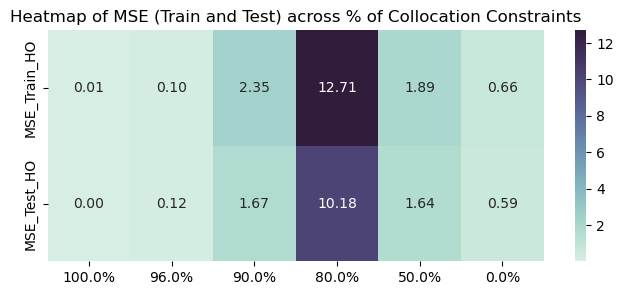

In [5]:
time_elapsed_ho, mse_train_ho, mse_test_ho = extract_metrics(results_ho_constr_n)
keys = list(results_ho_constr_n.keys())

df = pd.DataFrame({
    #'Reg_Strength': keys,
    # 'Time Elapsed HO': time_elapsed_ho,
    'MSE_Train_HO': mse_train_ho,
    'MSE_Test_HO': mse_test_ho,
}).T

#pivot_table = df.pivot(index='Reg_Strength', columns=['consrtaint_tol'], values='MSE_Train_HO')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)
                       
tick_positions = np.arange(len(keys))  # Use np.arange for exact index positions
tick_labels = [str(np.round(int(200 - 200//k)/2))+'%' for k  in keys]
                             
plt.figure(figsize=(8, 3))
ax = sns.heatmap(df, annot=True, fmt=".2f", cmap=cmap, annot_kws={'size': 10})

plt.title('Heatmap of MSE (Train and Test) across % of Collocation Constraints')

ax.set_xticks(tick_positions + 0.5)  
ax.set_xticklabels(tick_labels)

plt.show()

### Regularization

In [22]:
with open('results/pyomo_results_reg_2024-08-14_11-05-41.pkl', 'rb') as file:
    results_reg_ho = pickle.load(file)

with open('results/pyomo_results_reg_2024-08-14_11-48-20.pkl', 'rb') as file:
    results_reg_vdp = pickle.load(file)
    
with open('results/pyomo_results_reg_2024-08-14_11-53-46.pkl', 'rb') as file:
    results_reg_do = pickle.load(file)

with open('results/pyomo_results_reg_2024-08-14_11-02-19.pkl', 'rb') as file:
    results_reg_norm = pickle.load(file) # ho
    
keys = list(results_reg_ho.keys())

time_elapsed_ho, mse_train_ho, mse_test_ho = extract_metrics(results_reg_ho)
time_elapsed_vdp, mse_train_vdp, mse_test_vdp = extract_metrics(results_reg_vdp)
time_elapsed_do, mse_train_do, mse_test_do = extract_metrics(results_reg_do)
    
df = pd.DataFrame({
    'Reg Strength': keys,
    'Time Elapsed HO': time_elapsed_ho,
    'Time Elapsed VDP': time_elapsed_vdp,
    'Time Elapsed DO': time_elapsed_do,
    'MSE Train HO': mse_train_ho,
    'MSE Train VDP': mse_train_vdp,
    'MSE Train DO': mse_train_do,
    'MSE Test HO': mse_test_ho,
    'MSE Test VDP': mse_test_vdp,
    'MSE Test DO': mse_test_do
})

display(df.T)


,0,1,2,3,4,5,6,7
Reg Strength,1.000000e-07,0.000001,0.000010,0.000100,0.001000,0.010000,0.100000,1.000000
Time Elapsed HO,2.977461e+01,32.508947,7.946084,2.799575,2.202133,1.532549,2.585719,4.720815
Time Elapsed VDP,8.211527e+00,10.522110,17.918370,7.372392,4.877921,3.461447,4.497927,158.613230
Time Elapsed DO,3.338108e+01,21.102988,11.935450,4.977235,3.874517,5.502752,3.202409,7.061539
MSE Train HO,6.538150e-01,0.340933,0.263469,0.002165,0.006104,0.006077,0.012205,0.447567
MSE Train VDP,3.059666e+00,2.391632,0.274181,0.054286,0.019385,0.073406,0.389387,0.448215
MSE Train DO,3.936542e+03,307.674292,0.047853,0.003419,0.001587,0.001119,0.004324,0.303106
MSE Test HO,5.211926e-01,2739.150374,245.166154,0.006502,0.003539,0.003822,0.022846,0.842995
MSE Test VDP,1.803162e+02,9.027527,34.268013,0.502660,0.467538,0.975101,2.330266,4.173948
MSE Test DO,7.039467e-01,4.558237,4.075259,0.018929,0.010591,0.001193,0.006506,1.251870


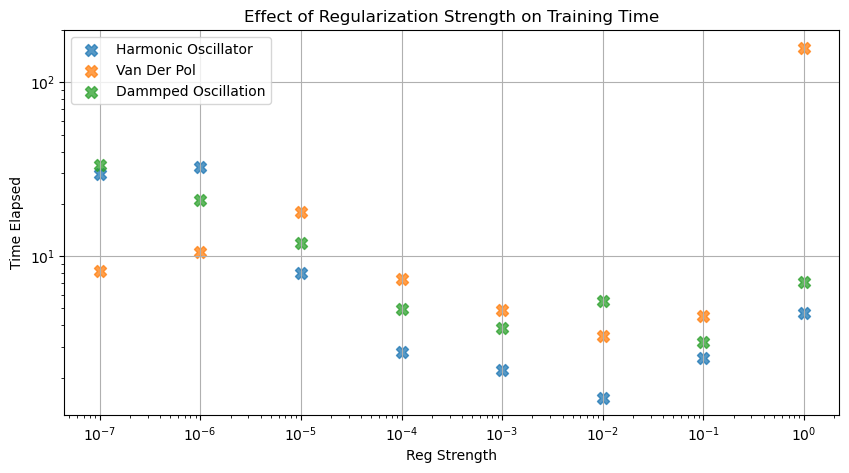

In [23]:
plt.figure(figsize=(10, 5))
plt.grid()
mark = 'X'
s = 75
alpha = 0.75
plt.scatter(keys, time_elapsed_ho, s = s, marker=mark, label = 'Harmonic Oscillator', alpha = alpha)
plt.scatter(keys, time_elapsed_vdp, s = s, marker=mark, label = 'Van Der Pol', alpha = alpha)
plt.scatter(keys, time_elapsed_do, s = s, marker=mark, label = 'Dammped Oscillation', alpha = alpha)
plt.title('Effect of Regularization Strength on Training Time')
plt.xlabel('Reg Strength')
plt.ylabel('Time Elapsed')  
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

## Regularization - Gauss Legendre

In [25]:
fn = '2024-08-16_17-37-12_reg_gl_ho.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_ho = pickle.load(file)
    
fn = '2024-08-16_18-24-34_reg_vdp_gl.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_vdp = pickle.load(file)
    
fn = '2024-08-16_18-41-43_reg_do_gl.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_do = pickle.load(file)
    
keys = list(results_reg_ho.keys())

results_reg_do = list(results_reg_do.items())
results_reg_do.insert(0, (0, {'time_elapsed': np.array(np.nan), 'mse_train': np.array(np.nan), 'mse_test': np.array(np.nan)}))
results_reg_do = dict(results_reg_do)

time_elapsed_ho, mse_train_ho, mse_test_ho = extract_metrics(results_reg_ho)
time_elapsed_vdp, mse_train_vdp, mse_test_vdp = extract_metrics(results_reg_vdp)
time_elapsed_do, mse_train_do, mse_test_do = extract_metrics(results_reg_do)
    
df = pd.DataFrame({
    'Reg Strength': keys,
    'Time Elapsed HO': time_elapsed_ho,
    'Time Elapsed VDP': time_elapsed_vdp,
    'Time Elapsed DO': time_elapsed_do,
    'MSE Train HO': mse_train_ho,
    'MSE Train VDP': mse_train_vdp,
    'MSE Train DO': mse_train_do,
    'MSE Test HO': mse_test_ho,
    'MSE Test VDP': mse_test_vdp,
    'MSE Test DO': mse_test_do
})

display(df.T)


,0,1,2,3,4,5
Reg Strength,0.0,0.000001,0.0001,0.01,0.1,1.0
Time Elapsed HO,542.626417,156.100788,3.21836,2.472349,2.202613,8.600358
Time Elapsed VDP,152.875177,17.355022,6.315841,2.961077,3.288942,11.632255
Time Elapsed DO,nan,97.248757,3.80045,2.704986,2.932369,5.488711
MSE Train HO,27170.996018,2787.494739,0.002236,0.006104,0.012245,0.450414
MSE Train VDP,3.053859,245.939868,0.022058,0.070739,0.391441,2.581614
MSE Train DO,NaN,7.594268,0.003468,0.001127,0.004339,0.305019
MSE Test HO,0.876986,0.623553,0.00653,0.003811,0.022738,0.841134
MSE Test VDP,4.361434,1858.491905,1.047934,0.831485,2.324695,6.458044
MSE Test DO,NaN,0.26085,0.019561,0.001186,0.006545,1.252703


### Pre-Training

In [15]:
with open('results/2024-08-14_15-12-57_pre_init.pkl', 'rb') as file:
    results_pre_init = pickle.load(file)

with open('results/2024-08-14_15-14-45_NO_pre_init.pkl', 'rb') as file:
    results_no_init = pickle.load(file)
    
keys = list(results_pre_init.keys())

time_elapsed_pre_init, mse_train_pre_init, mse_test_pre_init = extract_metrics(results_pre_init)
time_elapsed_no_init, mse_train_no_init, mse_test_no_init = extract_metrics(results_no_init)

In [16]:
df = pd.DataFrame({
    'Keys': keys,
    'Time Elapsed PRE': time_elapsed_pre_init,
    'Time Elapsed NO': time_elapsed_no_init,
    
    'MSE Train PRE': mse_train_pre_init,
    'MSE Train NO': mse_train_no_init,
    
    'MSE Test PRE': mse_test_pre_init,
    'MSE Test NO': mse_test_no_init,
})


df.T


,0,1,2
Keys,ho,vdp,do
Time Elapsed PRE,1.598969,3.676053,1.82936
Time Elapsed NO,4.335938,6.335849,3.319605
MSE Train PRE,0.006077,0.073406,0.000981
MSE Train NO,0.005996,0.074356,0.000981
MSE Test PRE,0.003822,0.975101,0.000239
MSE Test NO,0.003795,0.978592,0.000239


### Tolerances

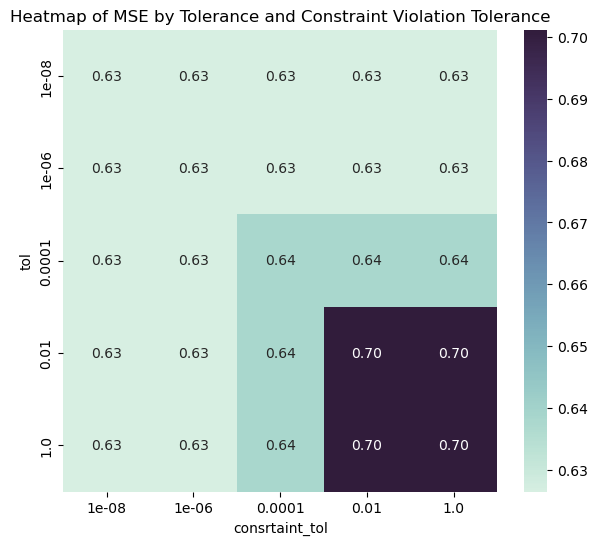

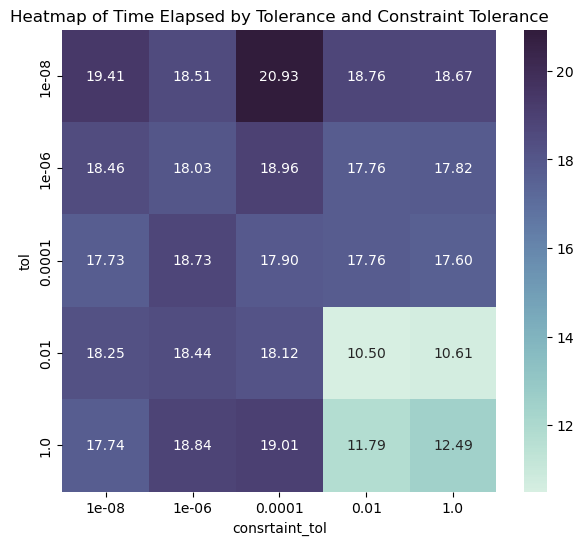

In [17]:
# [2, 16, 2]
with open('results/2024-08-14_17-06-25_tolerances.pkl', 'rb') as file:
    results_tolerances = pickle.load(file)

# [2, 64, 2]; vdp
with open('results/2024-08-14_18-07-50_tolerances.pkl', 'rb') as file:
    results_tolerances = pickle.load(file)

"""fn = '2024-08-15_15-03-57_tolerances_no_pretrain.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tolerances = pickle.load(file)
"""
keys = list(results_tolerances.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results_tolerances)

tol = [key[0] for key in keys]
consrtaint_tol = [key[1] for key in keys]

data = pd.DataFrame({
    'tol': tol,
    'consrtaint_tol': consrtaint_tol,
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})

pivot_table = data.pivot(index='tol', columns=['consrtaint_tol'], values='mse_test')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)
                             
plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE by Tolerance and Constraint Violation Tolerance')
plt.show()

pivot_table = data.pivot(index='tol', columns=['consrtaint_tol'], values='time_elapsed')

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of Time Elapsed by Tolerance and Constraint Tolerance')
plt.show()

In [11]:
if False:
    with open('results/2024-08-14_17-03-01_tolerances.pkl', 'rb') as file:
        results_tolerances = pickle.load(file)

    keys = list(results_tolerances.keys())
    time_elapsed, mse_train, mse_test = extract_metrics(results_tolerances)

    tol = [key[0] for key in keys]
    consrtaint_tol = [key[1] for key in keys]

    data = pd.DataFrame({
        'tol': tol,
        'consrtaint_tol': consrtaint_tol,
        'time_elapsed': time_elapsed,
        'mse_train': mse_train,
        'mse_test': mse_test
    })

    pivot_table = data.pivot(index='tol', columns=['consrtaint_tol'], values='mse_test')

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap='coolwarm')
    plt.title('Heatmap of MSE by Tolerance and Constraint Violation Tolerance')
    plt.show()

    pivot_table = data.pivot(index='tol', columns=['consrtaint_tol'], values='time_elapsed')

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Time Elapsed by Tolerance and Constraint Tolerance')
    plt.show()

## Activation Functions

In [42]:
fn = 'results/2024-08-20_12-08-10_act_function.pkl'
with open(fn, 'rb') as file:
    activation_functions = pickle.load(file)
    
fn = 'results/2024-08-20_12-11-06_weight_init.pkl'
with open(fn, 'rb') as file:
    weight_initialization = pickle.load(file)

In [39]:
Results = reload_module('analyse_results', 'Results')
Results.key_sample(activation_functions)
df = Results.parse_results(activation_functions, ['activation_function', 'data_type'])
df

,activation_function,data_type,time_elapsed,mse_train,mse_test,termination
0,tanh,ho,2.346099,0.006103540553586588,0.003539054942720534,optimal
1,tanh,vdp,4.739248,0.019384845842446655,0.4675382208315109,optimal
2,tanh,do,1.808666,0.0011576494968586187,0.0033569809925847603,optimal
3,softplus,ho,2.248466,0.22362176319818206,0.3449358118538195,optimal
4,softplus,vdp,74.866018,2.997944397826737,4.507898577885024,optimal
5,softplus,do,2.305133,0.3342941998302999,0.22464628003195944,optimal
6,sigmoid,ho,1.722631,0.5348629636301095,0.6573964272940006,optimal
7,sigmoid,vdp,7.698933,3.3410594333381556,4.671428686365343,optimal
8,sigmoid,do,11.948011,0.4069448729256558,0.15020420505338514,optimal


In [45]:
Results = reload_module('analyse_results', 'Results')
Results.key_sample(weight_initialization)
df = Results.parse_results(weight_initialization, ['weight_init', 'data_type'])
df

,weight_init,data_type,time_elapsed,mse_train,mse_test,termination
0,xavier,ho,2.637718,0.006103540553586588,0.003539054942720534,optimal
1,xavier,vdp,4.092812,0.019384845842446655,0.4675382208315109,optimal
2,xavier,do,1.707555,0.0011576494968586187,0.0033569809925847603,optimal
3,he,ho,2.251488,0.006039910624169319,0.003528184794039476,optimal
4,he,vdp,4.000421,0.04282690664838171,1.021127318038691,optimal
5,he,do,2.104454,0.001157649496946045,0.003356980992810408,optimal
6,random,ho,2.549453,0.006052636595025375,0.0035328184175410704,optimal
7,random,vdp,10.797162,0.04647039429329244,1.0018327422297413,optimal
8,random,do,2.202292,0.0011576495075533851,0.0033569810218557834,optimal


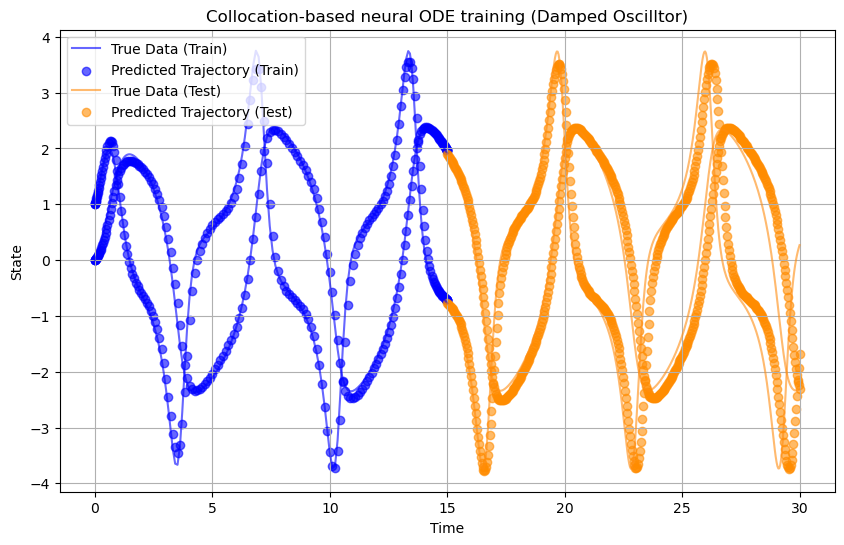

In [ ]:
result = results_tolerances[(1, 1)]

y_pred = result['odeint_pred']
y_pred_test = result['odeint_pred_test']

plt.figure(figsize=(10, 6))

plt.plot(trainer.t, trainer.y[:,0], color = 'blue', label='True Data (Train)', alpha = 0.6)
plt.plot(trainer.t, trainer.y[:,1], color = 'blue', alpha = 0.6)
plt.scatter(trainer.t, y_pred[:,0], color = 'blue', label='Predicted Trajectory (Train)', alpha = 0.6)
plt.scatter(trainer.t, y_pred[:,1], color = 'blue', alpha = 0.6)

plt.plot(trainer.t_test, trainer.y_test[:,0], color='#FF8C10', label='True Data (Test)', alpha = 0.6)
plt.plot(trainer.t_test, trainer.y_test[:,1], color='#FF8C10', alpha = 0.6)
plt.scatter(trainer.t_test, y_pred_test[:,0], color='#FF8C00', label='Predicted Trajectory (Test)', alpha = 0.6)
plt.scatter(trainer.t_test, y_pred_test[:,1], color='#FF8C00', alpha = 0.6)

plt.title(f"Collocation-based neural ODE training (Damped Oscilltor)")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend(loc ="upper left")
plt.grid(True)
plt.show()

## Network Architecture

In [204]:
file_name = "2024-08-14_17-53-06_network_sizes.pkl"
with open(f'results/{file_name}', 'rb') as file:
    results_net_sizes = pickle.load(file)

keys = list(results_net_sizes.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results_net_sizes)

df = pd.DataFrame({
    'consrtaint_tol': keys,
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})

df

,consrtaint_tol,time_elapsed,mse_train,mse_test
0,"[2, 4, 2]",1.802124,0.041125,0.636352
1,"[2, 8, 2]",2.082503,0.037405,0.979398
2,"[2, 16, 2]",4.156607,0.019385,0.467538
3,"[2, 32, 2]",7.680578,0.022517,0.613944
4,"[2, 64, 2]",18.175085,0.023645,0.626486
5,"[2, 128, 2]",31.460556,0.025816,0.559247


In [12]:
fn = '2024-08-19_21-15-03_training.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_net_sizes = pickle.load(file)

keys = list(results_net_sizes.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results_net_sizes)

df = pd.DataFrame({
    'consrtaint_tol': keys,
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})

# drop rows with NaN
df = df.dropna()

In [13]:
df

,consrtaint_tol,time_elapsed,mse_train,mse_test
0,1,0.283032,17.222053,3.419121
1,2,0.428411,6.892097,11.078005
2,3,0.486208,6.149927,8.234912
3,4,0.632537,0.287523,1.964570
4,5,0.695010,0.457015,2.901127
5,6,0.785764,1.155527,3.480471
6,7,0.943075,0.289171,2.378571
7,8,1.284489,2.756576,6.349436
8,9,1.293624,0.307054,2.777716
9,10,1.147211,0.163385,1.699555


[]

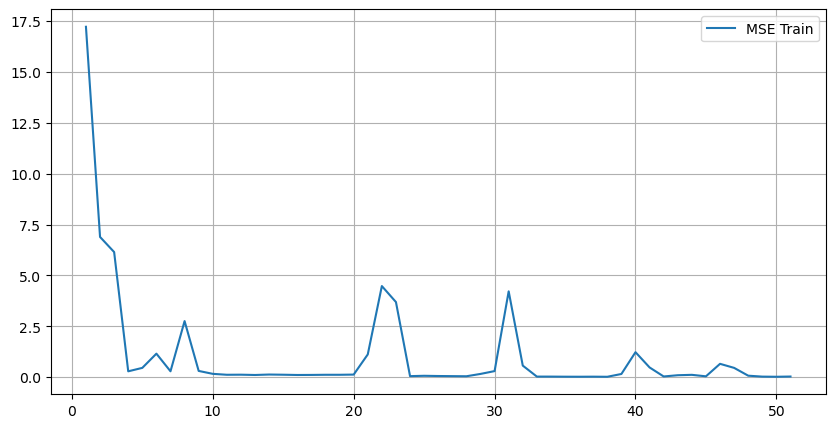

In [14]:
# plot
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(df['consrtaint_tol'], df['mse_train'], label='MSE Train')
#plt.plot(df['consrtaint_tol'], df['mse_test'], label='MSE Test')
plt.legend()
plt.plot()

----
## Network Architecture

In [141]:
fn = '2024-08-20_12-44-48_network_size.pkl'

with open(f'results/{fn}', 'rb') as file:
    results = pickle.load(file)

keys = list(results.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results)

df = pd.DataFrame({
    'hidden_layer': [key[0] for key in keys],
    'regularizarition': [key[1] for key in keys],
    'tolerance': [key[2] for key in keys],
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})


In [142]:
df

,hidden_layer,regularizarition,tolerance,time_elapsed,mse_train,mse_test
0,16,0.0001,0.000100,2.267167,0.002166,0.006502
1,16,0.0001,0.000001,1.932918,0.002165,0.006502
2,16,0.0010,0.000100,1.870192,0.006108,0.003544
3,16,0.0010,0.000001,2.351450,0.006104,0.003539
4,16,0.0100,0.000100,1.287078,0.006089,0.003822
5,16,0.0100,0.000001,1.480869,0.006077,0.003822
6,32,0.0001,0.000100,2.454672,0.001640,0.004142
7,32,0.0001,0.000001,2.813603,0.001638,0.004165
8,32,0.0010,0.000100,1.728477,0.005779,0.003476
9,32,0.0010,0.000001,2.329473,0.005904,0.003512


## Training Convergence

In [193]:
max(df.iter)

50

### reg

In [225]:
fn = '2024-08-20_21-01-08_training_convergence.pkl' # reg : 0.0001
fn = '2024-08-21_09-45-20_training_convergence.pkl' # reg : 0.001

with open(f'results/{fn}', 'rb') as file:
    results = pickle.load(file)

keys = list(results.keys())
time_elapsed, mse_train, mse_test = extract_metrics(results)

df = pd.DataFrame({
    #'keys' : keys,
    'iter': [key[2] for key in keys],
    'data_type': [key[0] for key in keys],
    'initialization': [key[1] for key in keys],
    'time_elapsed': time_elapsed,
    'mse_train': mse_train,
    'mse_test': mse_test
})

df_grouped = df.groupby(['data_type', 'initialization']).agg(list)
df_grouped
df

,iter,data_type,initialization,time_elapsed,mse_train,mse_test
0,1,ho,True,0.599543,0.455151,0.951167
1,2,ho,True,0.714396,0.036515,0.041925
2,3,ho,True,0.749067,0.012422,0.011876
3,4,ho,True,0.790038,0.013651,0.011381
4,5,ho,True,1.132546,0.013645,0.011364
...,...,...,...,...,...,...
253,41,do,False,5.068673,0.001148,0.000200
254,42,do,False,3.834637,0.000987,0.000240
255,43,do,False,4.541962,0.000981,0.000239
256,44,do,False,3.369592,0.000981,0.000239


In [226]:
# select a specifc row
df = df_grouped.loc['vdp', True]
len(df.iter)

34

[]

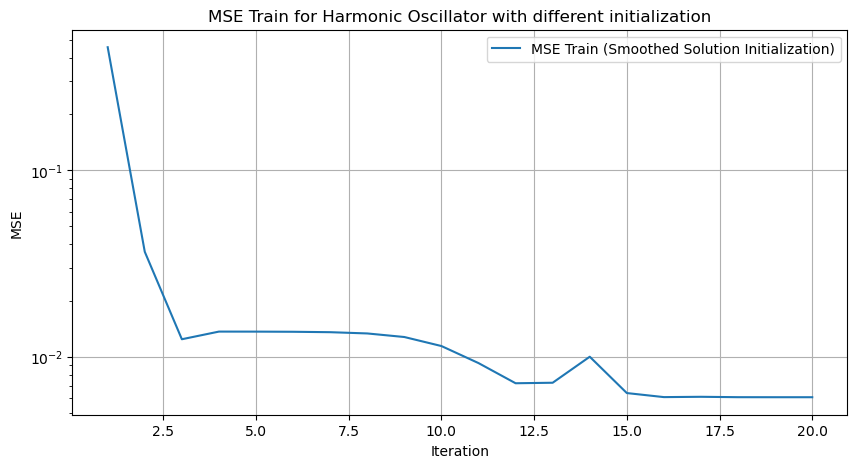

In [247]:
data = 'ho'

df_true = df_grouped.loc[data, True]
df_false = df_grouped.loc[data, False]

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(df_true.iter, df_true.mse_train, label='MSE Train (Smoothed Solution Initialization)')
#plt.plot(df_true.iter, df_true.mse_test, label='MSE Test')
#plt.plot(df_false.iter, df_false.mse_train, label='MSE Train (Fixed 0.1 Initialization)')
#plt.plot(df_false.iter, df_false.mse_test, label='MSE Test')
plt.legend()
plt.yscale('log')
desc = {'ho': 'Harmonic Oscillator', 'vdp': 'Van Der Pol', 'do': 'Damped Oscillator'}
plt.title(f'MSE Train for {desc[data]} with different initialization')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.plot()